# Линейная регрессия
__Суммарное количество баллов: 10__

__Решение отправлять на `ml.course.practice@gmail.com`__

__Тема письма: `[ITMO][ML][MS][HW03] <ФИ>`, где вместо `<ФИ>` указаны фамилия и имя__

In [155]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import copy

In [156]:
def read_data(path="boston.csv"):
    dataframe = np.genfromtxt(path, delimiter=",", skip_header=15)
    X = dataframe[:, :-1]
    y = dataframe[:, -1]
    return X, y

In [157]:
def generate_synthetic(size:int, dim=6, noise=0.1):
    X = np.random.randn(size, dim)
    w = np.random.randn(dim + 1)
    noise = noise * np.random.randn(size)
    y = X.dot(w[1:]) + w[0] + noise
    return X, y

### Задание 1 (1 балл)
Для начала нужно понять, какую метрику для ошибки будем использовать. В нашем случае нам подойдет стандартная метрика MSE. Ее и нужно реализовать.

In [158]:
def mse(y_true:np.ndarray, y_predicted:np.ndarray):
    return np.mean((y_true - y_predicted)**2)

### Задание 2 (3 балла)
Теперь реализуем линейную регрессию при помощи явного решения задачи минимизации. 

#### Методы
`fit(X, y)` - решает задачу минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$. 

`predict(X)` - строит предсказание `y` для объектов из `X`.

In [159]:
class NormalLR:
    def __init__(self):
        self.w=None
    
    def fit(self, X:np.ndarray, y:np.ndarray):
        self.w=np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
    
    def predict(self, X:np.ndarray) -> np.ndarray:
        return np.dot(X, self.w)

In [160]:
X, y = generate_synthetic(1024)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
means, stds = X.mean(axis=0), X.std(axis=0)
X = (X - means) / stds
N = X.shape[0]
ones_column = np.ones((N, 1))
X = np.hstack((X, ones_column))

In [161]:
regr = NormalLR()
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))

0.012704982905363605


### Задание 3 (2 балла)
Теперь реализуем линейную регрессию с использованием градиентного спуска с larning rate `alpha` в течении `iterations` итераций. В задании необходимо использовать регуляризацию Лассо с коэффициентом `l`.

#### Методы
`fit(X, y)` - приближает решение задачи минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$ при помощи градиентного спуска. 


`predict(X)` - строит предсказание `y` для объектов из `X`.

In [162]:
class GradientLR:
    def __init__(self, alpha:float, iterations=10000, l=0.):
        self.alpha = alpha
        self.iterations = iterations
        self.l = l    
    def fit(self, X:np.ndarray, y:np.ndarray):
        self.w = np.zeros(X.shape[1])
        for k in range(self.iterations):
          for i, x in enumerate(X):
            gradient_form = np.dot(x, self.w)
            self.w = self.w - self.alpha * (2 * (gradient_form - y[i]) * x/len(X)  + self.l * (np.sign(self.w)))      
    def predict(self, X:np.ndarray):
        return np.dot(X, self.w)

In [163]:
def build_plot(X_train:np.ndarray, y_train:np.ndarray, X_test:np.ndarray, y_test:np.ndarray, task):
    if (task == "task4"):
      pow = [0.0, 0.05, 0.1, 0.2, 0.3]
    else:
      pow = [0.0, 0.1, 0.3, 1]
    err = []
    for p in pow:
      regr = GradientLR(0.1, 300, p)
      regr.fit(X_train, y_train)
      err.append(mse(y_test, regr.predict(X_test)))
    plt.plot(pow, err, 'ro')
    plt.show()

In [164]:
X, y = generate_synthetic(1024)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
means, stds = X.mean(axis=0), X.std(axis=0)
X = (X - means) / stds
N = X.shape[0]
ones_column = np.ones((N, 1))
X = np.hstack((X, ones_column))

2.2172894030148522


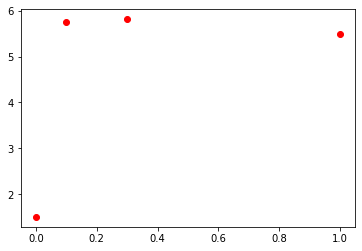

In [165]:

regr = GradientLR(0.1, iterations=500, l = 0.001)
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
build_plot(X_train, y_train, X_test, y_test, "task3")

### Задание 4 (2 балла)
Протесируйте оба метода на данных `boston.csv`, для градиентного спуска постройте график зависимости ошибки от коэффициента регуляризации. 

In [166]:
X, y = read_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)
X_train /= np.max(X_train, axis=0)
X_test /= (np.max(X_test, axis=0) + 1e-6)

In [167]:
regr = NormalLR()
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))

49023135.22274176


30370931.51828758


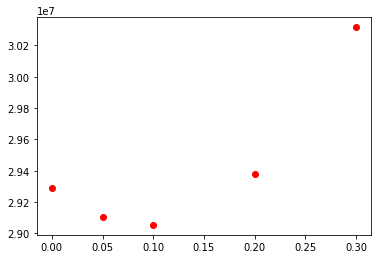

In [168]:
regr = GradientLR(0.1, iterations=500, l=0.17)
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
build_plot(X_train, y_train, X_test, y_test, "task4")

### Задание 5 (2 балла)
Проинтерпритируйте полученные результаты. Опишите влияние каждого признака на результат предсказания.

In [ ]:
"""
mse получилось довольно большое, следовательно, линейная модель плохо предсказывает цену на недвижимость. 
После добавления регуляризации mse становится пониже. 
Чтобы определить влияние feature на стоимость недвижимости, необходимо посмотреть на знак перед весом,
а также на абсолютную величину веса. Знак перед весом говорит о том, насколько feature отрицательно или положительно
влияет на стоимость недвижимости. Чем больше абсолютное значение величины, тем больший вклад она вносит в
ценообразование недвижимости.
Посмотрим на веса, обращая внимание на величину и на знак.
Цены растут по мере линейного увеличения стоимости rm. 
Цены имеют тенденцию к снижению с ростом lstat.
Эти признаки больше всего влияют на стоимость недвижимости.
Другие дают меньший вклад.
"""